In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import pygad

In [3]:
# Load data
data = pd.read_csv('complete_dataset.csv')

In [4]:

# Separate features and labels
X = data.drop(['Label', 'Timestamp'], axis=1)
y = data['Label']
del data

In [5]:

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
def fitness_func(solution, sol_idx):
    # Convert the solution to a boolean mask of selected features
    selected_features = np.array(solution, dtype=bool)
    # Check if no features are selected
    if not np.any(selected_features):
        # Return a very low fitness value
        return 0
    # Reshape the mask to a 2D array and remove extra dimensions
    selected_features = np.squeeze(selected_features.reshape(1, -1))
    # Apply the mask to the training and testing data
    X_train_subset = X_train[:, selected_features]
    X_test_subset = X_test[:, selected_features]
    # Train a decision tree with the selected features
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train_subset, y_train)
    # Make predictions and evaluate performance
    y_pred = dt.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    # Return the accuracy as the fitness value to maximize
    return accuracy


In [23]:

# Create an instance of the pygad.GA class
ga_instance = pygad.GA(num_generations=50,
                       sol_per_pop=10,
                       num_genes=X.shape[1],
                       num_parents_mating=5,  # add this line to specify the number of parents
                       fitness_func=fitness_func,
                       init_range_low=0,
                       init_range_high=1,
                       gene_type=int,
                       mutation_percent_genes=10,
                       crossover_type="two_points")

In [24]:

# Run the genetic algorithm to select features
ga_instance.run()

In [29]:
# Get the selected features from the best solution
selected_features = np.array(ga_instance.best_solution, dtype=bool)

In [39]:
X_train_subset = X_train[:, selected_features]

MemoryError: Unable to allocate 3.61 GiB for an array with shape (1, 6300496, 77) and data type float64

In [32]:
X_test_subset = X_test[:, selected_features]


In [35]:
X_test_subset = np.squeeze(X_test_subset, axis=1)
print("Shape of X_test_subset:", X_test_subset.shape)


Shape of X_test_subset: (1575124, 77)


In [36]:

# Train a decision tree with the selected features
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_test_subset, y_test)

DecisionTreeClassifier(random_state=42)

In [37]:

# Make predictions and evaluate performance
y_pred = dt.predict(X_test_subset)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

C:\Windows\Temp\ipykernel_4860\3858390453.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print("Selected features:", X.columns[selected_features])


Selected features: [['Dst Port' 'Flow Duration' 'Tot Fwd Pkts' 'Tot Bwd Pkts'
  'TotLen Fwd Pkts' 'TotLen Bwd Pkts' 'Fwd Pkt Len Max' 'Fwd Pkt Len Min'
  'Fwd Pkt Len Mean' 'Fwd Pkt Len Std' 'Bwd Pkt Len Max'
  'Bwd Pkt Len Min' 'Bwd Pkt Len Mean' 'Bwd Pkt Len Std' 'Flow IAT Mean'
  'Flow IAT Std' 'Flow IAT Max' 'Flow IAT Min' 'Fwd IAT Tot'
  'Fwd IAT Mean' 'Fwd IAT Std' 'Fwd IAT Max' 'Fwd IAT Min' 'Bwd IAT Tot'
  'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max' 'Bwd IAT Min'
  'Fwd PSH Flags' 'Bwd PSH Flags' 'Fwd URG Flags' 'Bwd URG Flags'
  'Fwd Header Len' 'Bwd Header Len' 'Fwd Pkts/s' 'Bwd Pkts/s'
  'Pkt Len Min' 'Pkt Len Max' 'Pkt Len Mean' 'Pkt Len Std' 'Pkt Len Var'
  'FIN Flag Cnt' 'SYN Flag Cnt' 'RST Flag Cnt' 'PSH Flag Cnt'
  'ACK Flag Cnt' 'URG Flag Cnt' 'CWE Flag Count' 'ECE Flag Cnt'
  'Down/Up Ratio' 'Pkt Size Avg' 'Fwd Seg Size Avg' 'Bwd Seg Size Avg'
  'Fwd Byts/b Avg' 'Fwd Pkts/b Avg' 'Fwd Blk Rate Avg' 'Bwd Byts/b Avg'
  'Bwd Pkts/b Avg' 'Bwd Blk Rate Avg' 'Subflow Fwd Pkts

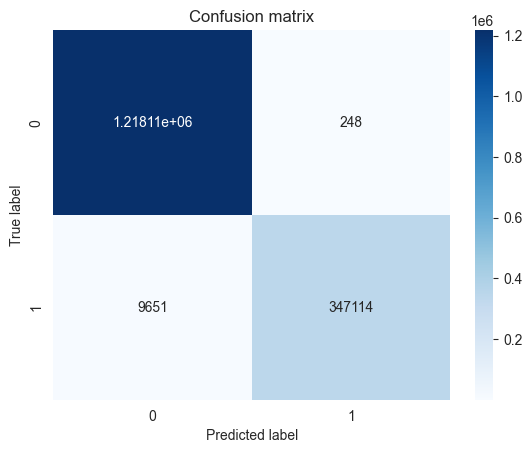

In [38]:

# Print results and plot confusion matrix
print("Selected features:", X.columns[selected_features])
print("Accuracy:", accuracy)
print("Confusion matrix:\n", cm)
plt.figure()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()
